## 그래프 시각화

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import matplotlib.font_manager as fm
import matplotlib

font_path = '/Library/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
font_name =  fm.FontProperties(fname=font_path, size=10).get_name()

matplotlib.rc('font', family=font_name)
fm._rebuild()

# Chapter 1. 신경망복습
## 수학과 파이썬 복습

In [1]:
# 벡터와 행렬
import numpy as np

x = np.array([1,2,3])
x.__class__ # 클래스 이름 표기

numpy.ndarray

In [2]:
x.shape

(3,)

In [6]:
x.ndim #1차원 배열이고 원소 수 3개인 벡터

1

In [7]:
W = np.array([[1,2,3],[4,5,6]])

In [8]:
W.shape

(2, 3)

In [9]:
W.ndim

2

In [11]:
#행렬의 원소별(element-wise) 연산
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [12]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [13]:
# 브로드캐스트
A = np.array([[1,2],[3,4]])
A*10

array([[10, 20],
       [30, 40]])

In [15]:
b = np.array([10,20])
A*b

array([[10, 40],
       [30, 80]])

In [17]:
# 벡터의 내적과 행렬의 곱
#벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [18]:
#행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

* 물론 둘다 np.dot() 가능하나 코드 상 분리해주어 의도를 명확히 하라!
* 행렬 형상 확인도 중요하다.

## 신경망의 추론
### 신경망 추론 전체 그림

In [20]:
# 완전연결계층에 의한 변환 미니배치 버전
import numpy as np
W1 = np.random.randn(2,4) #가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10,2) # 입력
h = np.matmul(x, W1) + b1
# 이를 비선형 효과 부여하는 것이 시그모이드입니다.

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
a = sigmoid(h)

In [25]:
# 신경망의 추론 정리
import numpy as np
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

In [26]:
print(s)

[[ 0.22070427  0.32307613 -1.20986535]
 [ 0.52263912 -0.15912166 -0.68624819]
 [ 0.59003801  0.05614804 -0.83803558]
 [ 0.14413684  0.54482023 -1.3760161 ]
 [ 0.52064946 -0.40946672 -0.58298002]
 [ 0.25810473  0.60267809 -1.32834165]
 [ 0.10706905  0.70880746 -1.40915585]
 [ 0.54234954 -0.05454548 -0.75123151]
 [ 0.30853025  0.12010321 -1.00253962]
 [ 0.5450725  -0.32357665 -0.60411009]]


In [27]:
#계층 클래스화 및 순전파 구현
#sigmoid

import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = [] #학습할 매개변수 없으니 빈 것이다.
        
    def forward(self, x):
        return 1 / (1+np.exp(-x))


In [28]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [29]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
        

In [31]:
a = ['A', 'B']
a += ['C', 'D']
a# 파이썬에서 리스트 결합방식

['A', 'B', 'C', 'D']

In [32]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

## 신경망의 학습
### 손실 함수
* 다중 클래스 분류 : 교차 엔트로피 오차
### 미분과 기울기
### 연쇄 법칙
### 계산 그래프
* 덧셈 노드
* 곱셈 노드
* 분기 노드
* Repeat 노드

In [33]:
import numpy as np
D, N = 8,7
x = np.random.randn(1, 0)
y = np.repeat(x, N, axis=0)
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims = True)

In [35]:
# Sum 노드
import numpy as np
D, N = 8,7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis = 0, keepdims= True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0) # 역전파 기울기

Sum 노드의 순전파 = Repeat 노드의 역전파  
Sum 노드의 역전파 = Repeat 노드의 순전파

In [37]:
#MatMul 노드
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params #???
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW #[...]으로 생략 기호를 활용하면, 넘파이 뱅려이 가리키는 메모리 위치를 고정시킨 후 그 위치에 원소를 덮는다.
        return dx

In [38]:
a = np.array([1,2,3])
b = np.array([4,5,6])

In [39]:
#sigmoid 계층
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [],[]
        self.out = None
        
    def forward(self, x):
        out = 1 / (1+ np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - xelf.out) * self.out
        return dx

In [40]:
#Affine
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [43]:
# 가중치 갱신
# 미니배치, 기울기 계산, 매개변수 갱신, 반복

class SGD:
    def __init__(self, lr=0.01): #초기화 학습률
        self.lr = lr
        
    def update(self, params, grads): #매개변수 갱신
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

    model = TwoLayerNet(...)
    optimizer = SGD()

    for i in range(10000):
        ...
        x_batch, t_batch = get_mini_batch(...) #미니배치 획득
        loss = model.forward(x_batch, t_batch)
        model.backward()
        optimizer.update(model.params, model.grads)
        ...

## 신경망으로 문제를 풀다
### 스파이럴 데이터셋

In [45]:
#스파이럴 데이터셋
import sys
sys.path.append('..') #부모 디렉터리 파일 가져오도록 설정
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


In [2]:
# 신경망 구현
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        #계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 가중치, 기울기를 리스트에 모으기
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

In [3]:
# predict 메서드
def predict(self, x):
    for layer in self.layers:
        x = layer.forward(x)
        return x
    
def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(Score, t)
    return loss

def backward(self, dout=1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(Self.layers):
        dout = layer.backward(dout)
    return dout

In [7]:
# 학습용 코드
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1) * batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구하는 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |    반복 %d / %d |   손실 %.2f'
                 % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


| 에폭 1 |    반복 10 / 10 |   손실 1.13
| 에폭 2 |    반복 10 / 10 |   손실 1.13
| 에폭 3 |    반복 10 / 10 |   손실 1.12
| 에폭 4 |    반복 10 / 10 |   손실 1.12
| 에폭 5 |    반복 10 / 10 |   손실 1.11
| 에폭 6 |    반복 10 / 10 |   손실 1.14
| 에폭 7 |    반복 10 / 10 |   손실 1.16
| 에폭 8 |    반복 10 / 10 |   손실 1.11
| 에폭 9 |    반복 10 / 10 |   손실 1.12
| 에폭 10 |    반복 10 / 10 |   손실 1.13
| 에폭 11 |    반복 10 / 10 |   손실 1.12
| 에폭 12 |    반복 10 / 10 |   손실 1.11
| 에폭 13 |    반복 10 / 10 |   손실 1.09
| 에폭 14 |    반복 10 / 10 |   손실 1.08
| 에폭 15 |    반복 10 / 10 |   손실 1.04
| 에폭 16 |    반복 10 / 10 |   손실 1.03
| 에폭 17 |    반복 10 / 10 |   손실 0.96
| 에폭 18 |    반복 10 / 10 |   손실 0.92
| 에폭 19 |    반복 10 / 10 |   손실 0.92
| 에폭 20 |    반복 10 / 10 |   손실 0.87
| 에폭 21 |    반복 10 / 10 |   손실 0.85
| 에폭 22 |    반복 10 / 10 |   손실 0.82
| 에폭 23 |    반복 10 / 10 |   손실 0.79
| 에폭 24 |    반복 10 / 10 |   손실 0.78
| 에폭 25 |    반복 10 / 10 |   손실 0.82
| 에폭 26 |    반복 10 / 10 |   손실 0.78
| 에폭 27 |    반복 10 / 10 |   손실 0.76
| 에폭 28 |    반복 10 / 10 |   손실 0.76
|

| 에폭 232 |    반복 10 / 10 |   손실 0.14
| 에폭 233 |    반복 10 / 10 |   손실 0.13
| 에폭 234 |    반복 10 / 10 |   손실 0.13
| 에폭 235 |    반복 10 / 10 |   손실 0.13
| 에폭 236 |    반복 10 / 10 |   손실 0.13
| 에폭 237 |    반복 10 / 10 |   손실 0.14
| 에폭 238 |    반복 10 / 10 |   손실 0.13
| 에폭 239 |    반복 10 / 10 |   손실 0.13
| 에폭 240 |    반복 10 / 10 |   손실 0.14
| 에폭 241 |    반복 10 / 10 |   손실 0.13
| 에폭 242 |    반복 10 / 10 |   손실 0.13
| 에폭 243 |    반복 10 / 10 |   손실 0.13
| 에폭 244 |    반복 10 / 10 |   손실 0.13
| 에폭 245 |    반복 10 / 10 |   손실 0.13
| 에폭 246 |    반복 10 / 10 |   손실 0.13
| 에폭 247 |    반복 10 / 10 |   손실 0.13
| 에폭 248 |    반복 10 / 10 |   손실 0.13
| 에폭 249 |    반복 10 / 10 |   손실 0.13
| 에폭 250 |    반복 10 / 10 |   손실 0.13
| 에폭 251 |    반복 10 / 10 |   손실 0.13
| 에폭 252 |    반복 10 / 10 |   손실 0.12
| 에폭 253 |    반복 10 / 10 |   손실 0.12
| 에폭 254 |    반복 10 / 10 |   손실 0.12
| 에폭 255 |    반복 10 / 10 |   손실 0.12
| 에폭 256 |    반복 10 / 10 |   손실 0.12
| 에폭 257 |    반복 10 / 10 |   손실 0.12
| 에폭 258 |    반복 10 / 10 |   손실 0.12
|

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text

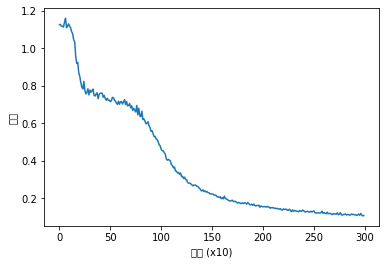

In [13]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

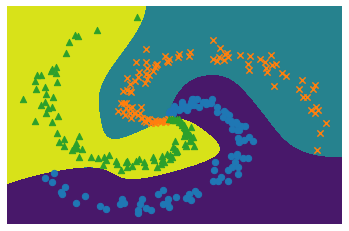

In [16]:
# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [8]:
import numpy as np
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

# Trainer 클래스
    model = TwoLayerNet(...)
    optimizer = SGD(lr = 1.0)
    trainer = Trainer(model, optimizer)

In [1]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size=3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 237 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 238 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 239 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 240 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 241 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 242 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 243 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 244 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 245 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 246 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 247 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 248 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 249 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 250 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 251 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 252 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 253 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 254 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 255 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 256 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 257 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 258 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 259 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 260 |  반복 1 / 10 | 시간 0[s] | 

<Figure size 640x480 with 1 Axes>

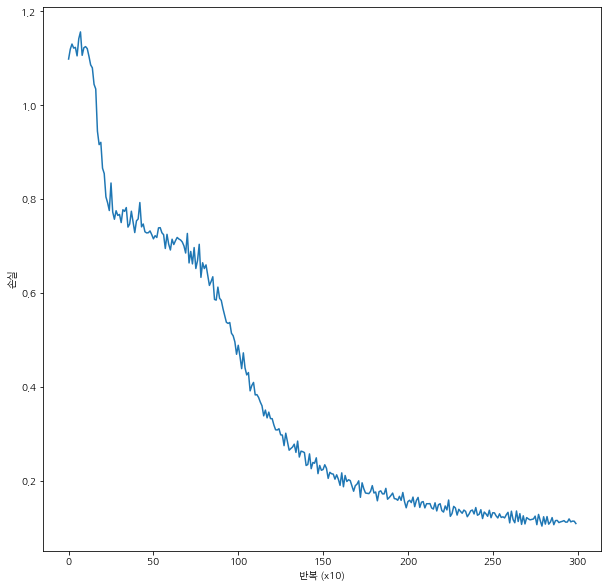

In [22]:
import warnings
warnings.filterwarnings("ignore")
trainer.plot()

In [23]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [24]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [25]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

### GPU(쿠파이)
엔비디아 GPU에서만 작동한다.  

    import cupy as cp
    x = cp.arange(6).reshape(2,3).astype('f')

In [30]:
# 쿠파이 활용한 train.py
!cat train.py

# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ===============================================
# config.GPU = True
# ===============================================
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from cbow import CBOW
from skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb


# 하이퍼파라미터 설정
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# 모델 등 생성
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습 시작
trainer.fit(cont

 쿠파이가 등장하는 ch04/train.py
 
    import sys
    sys.path.append('..')
    import numpy as np
    from common import config
    # GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
    # ===============================================
    # config.GPU = True
    # ===============================================
    
여기서 #config.GPU = True 실행하면, GPU로 계산이 가능하다. 훨씬 빠르다.

## 정리
>이번 장에서 배운 내용
* 신경망은 입력층, 은닉층(중간층), 출력층을 지닌다.
* 완전연결계층에 의해 선형 변환이 이뤄지고, 활성화 함수에 의해 비선형 변환이 이루어진다.
* 완전연결계층이나 미니배치 처리는 행렬ㄹ로 모아 한꺼번에 계산할 수 있다.
* 오차역전파법을 사용하여 신경망의 손실에 관한 기울기를 효율적으로 구할 수 있다.
* 신경망이 수행하는 처리는 계산 그래프로 시각화할 수 있고, 순전파와 역전파를 이해하는 데 도움이 된다.
* 신경망의 구성요소들을 계층으로 모듈화해두면, 이를 조립하여 신경망을 쉽게 구성할 수 있다.
* 신경망 고속화에는 GPU를 이용한 병렬 계산과 데이터의 비트 정밀도가 중요하다.